# On Learning Curves

sorce: [Learning Curves in Linear & Polynomial Regression](https://utkuufuk.com/2018/05/04/learning-curves)

### Load Data

historical records on the change in water level and the amount of water flowing out of the dam

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.io as sio

dataset = sio.loadmat('data/water.mat')
x_train = dataset['X']
x_val = dataset['Xval']
x_test = dataset['Xtest']

# squeeze the target variables into one-dimensional arrays, e.g. (12,1) -> (12,)
y_train = dataset['y'].squeeze()
y_val = dataset['yval'].squeeze()
y_test = dataset['ytest'].squeeze()

#### Plot the Training Sample

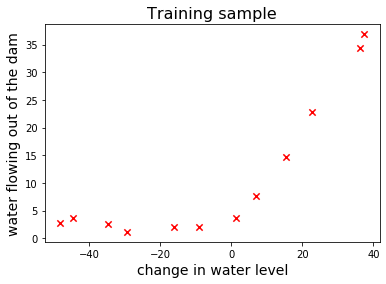

In [2]:
fig1, ax1 = plt.subplots()
ax1.scatter(x_train, y_train, marker='x', s=40, c='red')
plt.xlabel('change in water level', fontsize=14)
plt.ylabel('water flowing out of the dam', fontsize=14)
plt.title('Training sample', fontsize=16);

## Linear Regression

see [Linear Regression Notebook](linear-regression.ipynb) for cost-function and gradient descent.

In [3]:
def cost(theta, X, Y):
    predictions = X @ theta
    return np.sum(np.square(predictions - Y)) / (2 * len(Y))

def cost_gradient(theta, X, Y):
    predictions = X @ theta
    return X.T @ (predictions - Y) / len(Y)

def train_linear_regression(X, Y, alpha = 0.05, num_iters = 2000):
    cost_history = np.zeros(num_iters)
    theta = np.zeros(X.shape[1]).reshape(2,1)
    for n in range(num_iters):
        predictions = X @ theta
        errors = predictions - Y
        gradient = X.T @ errors
        theta -= alpha * gradient / len(Y)
        cost_history[n] = cost(theta, X, Y)
    return theta, cost_history

def insert_ones(x):
    X = np.ones(shape=(x.shape[0], x.shape[1] + 1))
    X[:, 1:] = x
    return X

In [4]:
X_train = insert_ones(x_train)
Y_train = y_train.reshape(len(y_train),1)
theta, cost_history = train_linear_regression(X_train, Y_train, 0.0023)

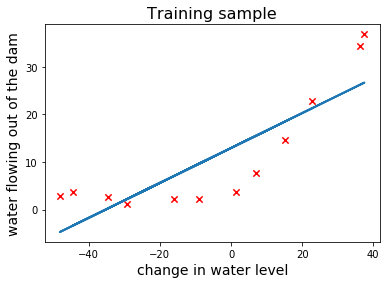

In [5]:
hypothesis = X_train @ theta
ax1.plot(X_train[:, 1], hypothesis, linewidth=2)
fig1

Finding a suitable **learning rate** $\alpha$ is difficult:

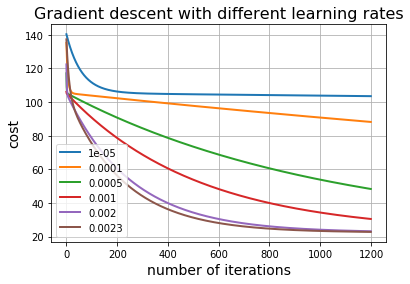

In [6]:
plt.figure()
num_iters = 1200
learning_rates = [0.00001, 0.0001, 0.0005, 0.001, 0.002, 0.0023]
for lr in learning_rates:
    _, cost_history = train_linear_regression(X_train, Y_train, lr, num_iters)
    plt.plot(cost_history, linewidth=2)
plt.title("Gradient descent with different learning rates", fontsize=16)
plt.xlabel("number of iterations", fontsize=14)
plt.ylabel("cost", fontsize=14)
plt.legend(list(map(str, learning_rates)))
plt.grid()

### Learning Curves

We start with 2 **training examples** and increase them one by one. 

In each iteration, we’ll train a model and evaluate the **training error** on the existing training sample, and the **validation error** on the whole **validation sample**:

In [7]:
def learning_curves(X_train, Y_train, X_val, Y_val):
    train_err = np.zeros(len(Y_train))
    val_err = np.zeros(len(Y_train))
    for i in range(1, len(Y_train)):
        theta, _ = train_linear_regression(X_train[0:i+1, :], Y_train[0:i+1], 0.0001)
        train_err[i] = cost(theta, X_train[0:i+1, :], Y_train[0:i+1])
        val_err[i] = cost(theta, X_val, Y_val)
    
    plt.plot(range(2, len(y_train) + 1), train_err[1:], c='r', linewidth=2)
    plt.plot(range(2, len(y_train) + 1), val_err[1:], c='b', linewidth=2)
    plt.xlabel('number of training examples', fontsize=14)
    plt.ylabel('error', fontsize=14)
    plt.legend(['training', 'validation'], loc='best')

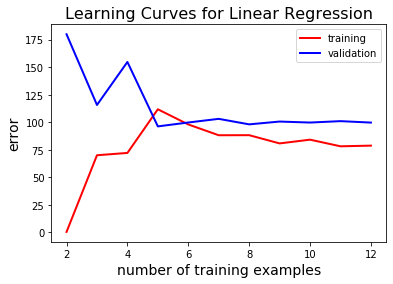

In [8]:
X_val = insert_ones(x_val)
Y_val = y_val.reshape(len(y_val),1)

plt.title("Learning Curves for Linear Regression", fontsize=16)
learning_curves(X_train, Y_train, X_val, Y_val)

As expected, **linear regression** is unable to sufficiently decrease either the training or the validation error.

## Linear Regression with Linear Correlation

For **comparison**, data which has a high correlation, has a **learning curve** which diverges to a low error for **training** and **validation**

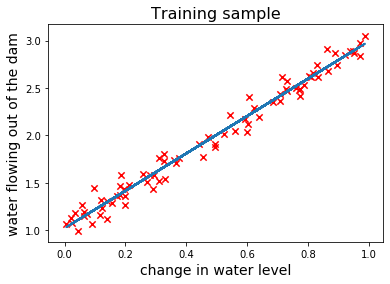

In [9]:
# Data Generation
np.random.seed(42)
x = np.random.rand(100, 1)
y = 1 + 2 * x + .1 * np.random.randn(100, 1)

# Shuffles the indices
idx = np.arange(100)
np.random.shuffle(idx)

# Uses first 80 random indices for train
train_idx = idx[:80]
# Uses the remaining indices for validation
val_idx = idx[80:]

# Generates train and validation sets
x_train, y_train = x[train_idx], y[train_idx]
x_val, y_val = x[val_idx], y[val_idx]

X_train = insert_ones(x_train)
Y_train = y_train.reshape(len(y_train),1)
theta, cost_history = train_linear_regression(X_train, Y_train, 0.05)

hypothesis = X_train @ theta

fig2, ax2 = plt.subplots()
ax2.scatter(x_train, y_train, marker='x', s=40, c='red')
ax2.plot(X_train[:, 1], hypothesis, linewidth=2)
plt.xlabel('change in water level', fontsize=14)
plt.ylabel('water flowing out of the dam', fontsize=14)
plt.title('Training sample', fontsize=16);

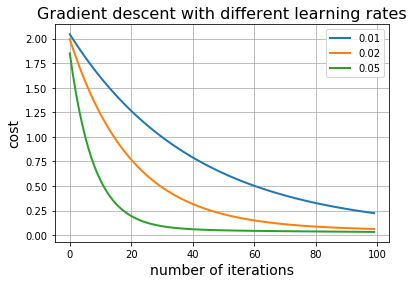

In [10]:
plt.figure()
num_iters = 100
learning_rates = [0.01, 0.02, 0.05]
for lr in learning_rates:
    _, cost_history = train_linear_regression(X_train, Y_train, lr, num_iters)
    plt.plot(cost_history, linewidth=2)
plt.title("Gradient descent with different learning rates", fontsize=16)
plt.xlabel("number of iterations", fontsize=14)
plt.ylabel("cost", fontsize=14)
plt.legend(list(map(str, learning_rates)))
plt.grid()

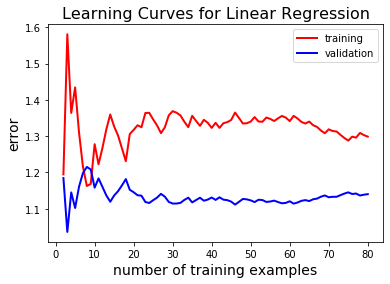

In [11]:
X_val = insert_ones(x_val)
Y_val = y_val.reshape(len(y_val),1)

plt.title("Learning Curves for Linear Regression", fontsize=16)
learning_curves(X_train, Y_train, X_val, Y_val)

## Polynominal Regression